#Introduction

In this notebook we will use a clustering algorithm to analyze our data (i.e. YouTube comments of a single video).
This will help us extract topics of discussion.
We use the embeddings generated in Assignment 4 as input. 
(This notebook will not run without first running the assignment 4 Notebook, as it relies on the data in the folder 'output/')
Each of our comments has been assigned a vector that encodes information about its meaning.
The closer two vectors are, the more similar the meaning.

Each vector is of 512 Dimensions.

Before we can cluster our data we need to reduce the embeddings' dimensionality to overcome the curse of dimensionality.
We use the UMAP ALgorithm for this.

After that we use the KMedoids Algorithm to partition the embedding space and generate our clusters this way.

We need to define the number of clusters we want to have. 
To find the optimal number of clusters, we use a simple optimization scheme.

Once the clusters are created, we visualize them.
To do this we reduce the dimensionality of the embeddings again to two dimensions.
Then we render a scatterplot of our data.

Furthermore we want to analyze and interpret our clusters.
To do this, we:
- print some statistics about each of the clusters
- print cluster's medoid (the central sample)
- print the cluster(s) we want to analyze further

Check to see if jupyter lab uses the correct python interpreter with '!which python'.
It should be something like '/opt/anaconda3/envs/[environment name]/bin/python' (on Mac).
If not, try this: https://github.com/jupyter/notebook/issues/3146#issuecomment-352718675

In [1]:
!which python

/Users/claudio/opt/anaconda3/envs/social_media_env/bin/python


In [2]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


# Install dependencies:

In [4]:
install_packages = False
if install_packages:    
    !conda install -c conda-forge umap-learn -y
    !conda install -c conda-forge scikit-learn-extra -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/claudio/opt/anaconda3/envs/social_media_env

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h033912b_0         138 KB  conda-forge
    certifi-2020.12.5          |   py36h79c6626_0         143 KB  conda-forge
    libllvm10-10.0.1           |       h009f743_3        20.8 MB  conda-forge
    llvmlite-0.34.0            |   py36h739e7dc_4         247 KB
    numba-0.51.2               |   py36h959d312_1         3.1 MB
    openssl-1.1.1h             |       haf1e3a3_0         1.9 MB  conda-forge
    tbb-2019.9                 |       ha1b3eb9_1         157 KB  

# Imports

In [1]:
#imports

import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import umap
from sklearn_extra.cluster import KMedoids
import seaborn as sns
#from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, OPTICS
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances

# Functions to Save and load manually

In [2]:
# Save and load your data after clustering

def save_results():
    data.to_pickle(output_path+'data_clustered'+'.pkl')
    
def load_results():
    data = pd.read_pickle(output_path+'data_clustered'+'.pkl')
    

In [3]:
# Set pandas print options
# This will improve readability of printed pandas dataframe.


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Set global Parameters
Set your parameters here:

output_path: Files generated in this notebook will be saved here.

model_type: Define which model was used to produce the embeddings. (Check the name of the .npy-file containing the embeddings)

In [5]:
output_path = "./output/"
model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

# Load Data
Load the preprocessed data as a pandas dataframe.
And load the embeddings as a numpy ndarray (a matrix in our case).

In [6]:
data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
labels_default = np.zeros(len(data.index))-1
data['label_manual'] = labels_default

In [7]:
embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

# Dimensionality reduction with UMAP

We reduce the number of dimensions of our embeddings to make possibly present clusters more pronounced. 
The number of dimensions (num_dimensions) depends on the number of samples

In [8]:
# Set the number of dimensions to reduce to
#num_dimensions =100

reducer_clustering = umap.UMAP(n_neighbors=5, 
                     #n_components=num_dimensions, 
                     metric='cosine', 
                     #n_epochs=200, 
                     learning_rate=.5,
                     init='spectral', 
                     min_dist=0,
                     #spread=5.0, 
                     #set_op_mix_ratio=1.0, 
                     #local_connectivity=1.0, 
                     #negative_sample_rate=5, 
                     #transform_queue_size=4.0, 
                     force_approximation_algorithm=True, 
                     unique=True)
embeddings_umap = reducer_clustering.fit_transform(embeddings)

# Optimize the Number of Clusters

n_clusters: 2 silhouette_avg: 0.6870123
n_clusters: 3 silhouette_avg: 0.702105
n_clusters: 4 silhouette_avg: 0.6907752
n_clusters: 5 silhouette_avg: 0.52212805
n_clusters: 6 silhouette_avg: 0.6003208
n_clusters: 7 silhouette_avg: 0.57228506
n_clusters: 8 silhouette_avg: 0.5715412
n_clusters: 9 silhouette_avg: 0.5172162
n_clusters: 10 silhouette_avg: 0.5228987
n_clusters: 11 silhouette_avg: 0.5368608
n_clusters: 12 silhouette_avg: 0.5161087
n_clusters: 13 silhouette_avg: 0.490019
n_clusters: 14 silhouette_avg: 0.4919409
n_clusters: 15 silhouette_avg: 0.4566962
n_clusters: 16 silhouette_avg: 0.47966802
n_clusters: 17 silhouette_avg: 0.5045664
n_clusters: 18 silhouette_avg: 0.47446102
n_clusters: 19 silhouette_avg: 0.43723163
n_clusters: 20 silhouette_avg: 0.46697778
n_clusters: 21 silhouette_avg: 0.47259536
n_clusters: 22 silhouette_avg: 0.48354304
n_clusters: 23 silhouette_avg: 0.48851725
n_clusters: 24 silhouette_avg: 0.51864177
n_clusters: 25 silhouette_avg: 0.5333379
n_clusters: 26 s

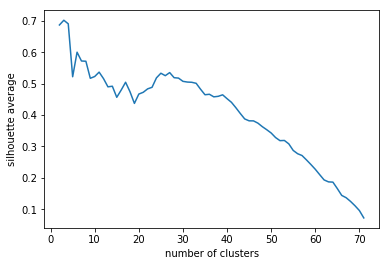

In [9]:
#optimize number of clusters
optimize_number_of_clusters = True#@param {type:'boolean'}

min_clusters=2 
max_clusters=72 
step=1#00 

if optimize_number_of_clusters:
    rows_list = []
    inertias = []
    n_clusters = []
    silouette_scores = []
    init_param = 'k-medoids++' #@param ['random', 'heuristic', 'k-medoids++']
    random_state_param=1234 #@param {type:'number'}
    for i in range(min_clusters,max_clusters, step):
        temp_clustering = KMedoids(n_clusters=i, metric='euclidean', init=init_param, max_iter=200, random_state=random_state_param).fit(embeddings_umap)
        silhouette_avg = silhouette_score(embeddings_umap, temp_clustering.labels_)
        print("n_clusters:",i, "silhouette_avg:",silhouette_avg)
        silhouette_dict = {'number of clusters': i, 'silhouette average': silhouette_avg}
        rows_list.append(silhouette_dict)
    results = pd.DataFrame(rows_list)
    sns.lineplot(x = 'number of clusters', y = 'silhouette average',data = results)

# Clustering with KMedoids

In [46]:
number_of_clusters =  15
init_param = 'k-medoids++' #@param ['random', 'heuristic', 'k-medoids++']
clustering_model = KMedoids(n_clusters=number_of_clusters,
                            metric='cosine', 
                            init=init_param, 
                            max_iter=150, 
                            random_state=None).fit(embeddings_umap)
clustering_model
labels = clustering_model.labels_
data["label_kmedoids"] = labels
print("cluster","members", data["label_kmedoids"].value_counts().sort_values())

clustering_model.inertia_

medoids_indices = clustering_model.medoid_indices_

cluster members 13     1
8      1
4      1
7      3
2      3
14     4
10     4
6      4
5      4
0      4
3      5
11     6
12    10
9     10
1     14
Name: label_kmedoids, dtype: int64


In [47]:
#calculate distances
distances = np.diag(pairwise_distances(X = clustering_model.cluster_centers_[labels], Y = embeddings_umap[:], metric='cosine'))
data["distance_kmedoids"] = distances

# Dimensionality Reduction for Visualization

In [48]:
num_dimensions =2

reducer_visualization = umap.UMAP(n_neighbors=50, 
                                  n_components=num_dimensions, 
                                  metric='cosine', 
                                  output_metric='euclidean', 
                                  #n_epochs=200, 
                                  learning_rate=.5,
                                  init='spectral', 
                                  min_dist=.1,
                                  spread=5.0, 
                                  set_op_mix_ratio=1.0, 
                                  local_connectivity=1.0, 
                                  negative_sample_rate=5, 
                                  transform_queue_size=4.0, 
                                  force_approximation_algorithm=True, 
                                  unique=True)
embeddings_umap_2d = reducer_visualization.fit_transform(embeddings)

/Users/claudio/opt/anaconda3/envs/social_media_env/lib/python3.6/site-packages/umap/umap_.py:1158: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


# Visualize clustering results

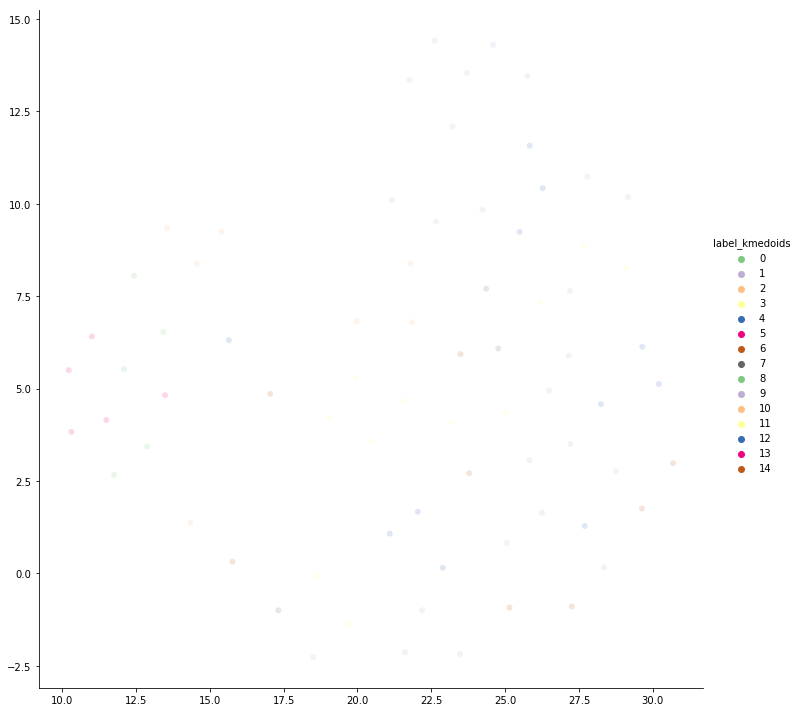

In [49]:
#@markdown Set the color palette used for visualizing different clusters
palette_param = "Accent" #@param ['Accent','cubehelix', "tab10", 'Paired', "Spectral"]
#@markdown Set opacity of data points (1 = opaque, 0 = invisible)
alpha_param = 0.16 #@param {type:"slider", min:0, max:1, step:0.01}


sns.relplot(x = embeddings_umap_2d[:, 0], y = embeddings_umap_2d[:, 1],  hue = data['label_kmedoids'], palette = palette_param,alpha = alpha_param,height = 10)


## Highlight one cluster

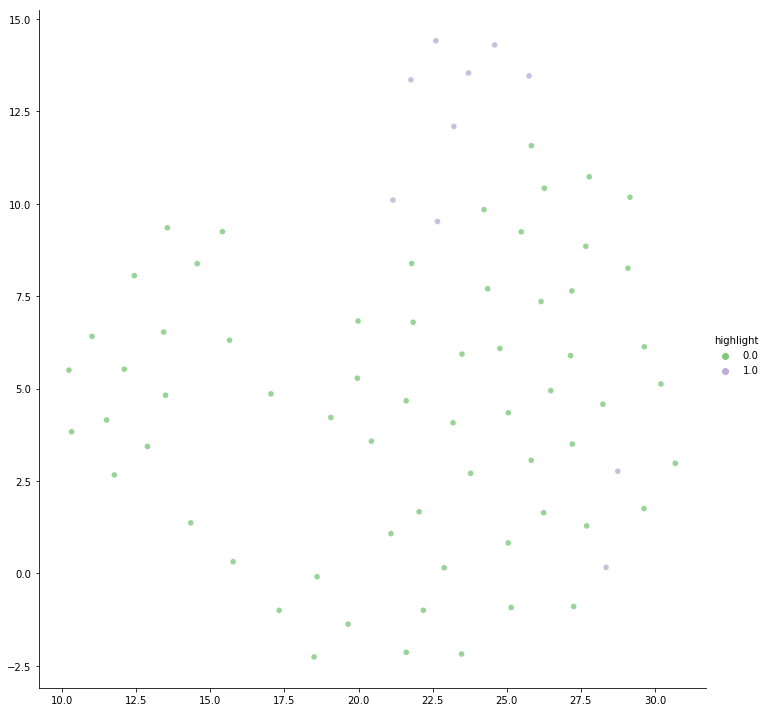

In [93]:
## Choose a cluster to higlight:
cluster_num = 9

data['highlight'] = np.zeros(len(data.index))
data.loc[data['label_kmedoids'] == cluster_num, 'highlight'] = 1

sns.relplot(x = embeddings_umap_2d[:, 0], y = embeddings_umap_2d[:, 1],  hue = data['highlight'], palette = "Accent",alpha = 0.8,height = 10)


# Print Medoids and cluster statistics

In [92]:
data[data['label_kmedoids'] == 3]

,publishedAt,authorName,text,isReply,cleaned,label_manual,label_kmedoids,distance_kmedoids,highlight
9,2019-11-12 23:07:27,Noah Hughes,"I'd also like to add the quote: ""I like to pay my taxes, with them i buy civilisation.""",1,"I'd also like to add the quote: ""I like to pay my taxes, with them i buy civilisation.""",-1.0,3,0.000113,0.0
17,2019-08-29 05:37:52,Kevin Odom,Propaganda for Fossil fuel Interest? Lol. Big climate makes big oil like a homeless man in San Francisco. Trillions per year at stake for these companies going green. So big even big oil is going into green businesses,0,Propaganda for Fossil fuel Interest? Lol. Big climate makes big oil like a homeless man in San Francisco. Trillions per year at stake for these companies going green. So big even big oil is going into green businesses,-1.0,3,0.000000,0.0
56,2019-08-29 05:39:49,Kevin Odom,Do you not realize that there’s nothing bigger than big climate/ green corporations? Trillions per year were up for grabs. Elon bus was just one example of govt giving billions to in subsidies just like they do oil etc,1,Do you not realize that there’s nothing bigger than big climate/ green corporations? Trillions per year were up for grabs. Elon bus was just one example of govt giving billions to in subsidies just like they do oil etc,-1.0,3,0.000033,0.0
63,2017-04-23 13:01:16,S Tho,Bald Men Win. Very well stated on the realities of Gold Mercantilism and the analogy to Carbon Mercantilism that could result in unseen social consequence.,1,. Very well stated on the realities of Gold Mercantilism and the analogy to Carbon Mercantilism that could result in unseen social consequence.,-1.0,3,0.000007,0.0
68,2017-04-23 13:14:51,S Tho,"Ex Gop. Correct. So DON'T BUY A TESLA. You can't consume your way out of an overconsumption problem. I've seen happy and even giddy people talking about trading in their two year old luxury Land Rover for a $120,000 electric luxury car for a three mile commute. Touting that they are helping the Earth. No they are just buying expensive stuff and bragging about it. Three !miles to work? Save the planet, WALK. Tesla is a good product, but right now it is aimed at the acquisition addicted upper middle class, typically young and overpaid for their experience and already so far in debt by 22 they just keep taking more loans to postpone solvency.",1,"Ex Gop. Correct. So DON'T BUY A TESLA. You can't consume your way out of an overconsumption problem. I've seen happy and even giddy people talking about trading in their two year old luxury Land Rover for a $120,000 electric luxury car for a three mile commute. Touting that they are helping the Earth. No they are just buying expensive stuff and bragging about it. Three !miles to work? Save the planet, WALK. Tesla is a good product, but right now it is aimed at the acquisition addicted upper middle class, typically young and overpaid for their experience and already so far in debt by 22 they just keep taking more loans to postpone solvency.",-1.0,3,0.000006,0.0


In [91]:
data[data['label_kmedoids'] == 9]

,publishedAt,authorName,text,isReply,cleaned,label_manual,label_kmedoids,distance_kmedoids,highlight
1,2020-05-20 18:54:00,Ma- c C,"more people will survives in hot climate ?? WTF This guy its on about full of crap , Belent",0,"more people will survives in hot climate ?? WTF This guy its on about full of crap , Belent",-1.0,9,0.000031,0.0
4,2020-01-15 09:10:59,Scherbenjongleur,"&quot;cold weather kills more people than warm weather&quot;... tell that to the australians whos houses burn down right now or the people of India, who have 122 °F in the summer",0,"""cold weather kills more people than warm weather""... tell that to the australians whos houses burn down right now or the people of India, who have 122 °F in the summer",-1.0,9,0.000001,0.0
5,2020-04-09 09:09:03,Soup,During all of history the cold has killed a lot more then warm weather,1,During all of history the cold has killed a lot more then warm weather,-1.0,9,0.000000,0.0
6,2020-01-15 16:56:41,Fedor Ilyin,Tell that to the Russians who have -49 °F in the winter,1,Tell that to the Russians who have -49 °F in the winter,-1.0,9,0.000003,0.0
25,2019-02-23 14:42:46,robert hicks,"No, the lie is that 97% of anyone agrees with agw. In order to get that number they have to get rid or count as supporter the vast majority, most of whom refuse to say they support or don't support because they do not know. Two studies were done. As with all studies they both had limits to prevent them from counting people that were not part of the study. One study limited the people that were counted people that had gotten published in an magazine controlled by the climate mafia. The other study limit was set people that had gotten a degree in a field of climate study (atmosphere, ocean or land) and had worked in the field studying the climate for at least 5 years. Which of the two do you think would be the most honest in determining what climate scientist think? Both of them asked the same question. In one of the questions (how much danger is there from co2 rise), a certain number said we should do anything, no matter how much harm it did to the civilization. The interesting thing is that both studies found the same number (or close to it). In one of the studies that number was 97% of the respondents. In the other, it was 22%. In the first less than 1% said there was no danger, while 54% of the second said this. In both, the rest were split between ""don't know"" and ""we should do reasonable things to slow it"". Why is there such a discrepancy in the percentage? The first study was only those that had published papers saying co2 was bad. In other words, it was 97% of people that say co2 is bad say we should do everything to stop it. The second was people that were actually trained to study it and had studied it for years. People like you do not like the second study because it does not fit your religion so it has to be bad.",1,"No, the lie is that 97% of anyone agrees with agw. In order to get that number they have to get rid or count as supporter the vast majority, most of whom refuse to say they support or don't support because they do not know. Two studies were done. As with all studies they both had limits to prevent them from counting people that were not part of the study. One study limited the people that were counted people that had gotten published in an magazine controlled by the climate mafia. The other study limit was set people that had gotten a degree in a field of climate study (atmosphere, ocean or land) and had worked in the field studying the climate for at least 5 years. Which of the two do you think would be the most honest in determining what climate scientist think? Both of them asked the same question. In one of the questions (how much danger is there from co2 rise), a certain number said we should do anything, no matter how much harm it did to the civilization. The interesting thing is that both studies found the same number (or close to it). In one of the studies that n

In [53]:
# print the medoids 
data.iloc[medoids_indices]      






,publishedAt,authorName,text,isReply,cleaned,label_manual,label_kmedoids,distance_kmedoids,highlight
12,2019-11-12 23:09:02,Noah Hughes,That's propaganda.,1,That's propaganda.,-1.0,0,0.000000e+00,0.0
22,2019-02-06 20:34:48,robert hicks,"&quot;most climate scientist … dismiss&quot; No, they do not. 54% of people TRAINED by accredited universities and colleges, in fields related to the climate and who have worked in the field for 5 years, say that co2 is not a danger.",0,"""most climate scientist … dismiss"" No, they do not. 54% of people TRAINED by accredited universities and colleges, in fields related to the climate and who have worked in the field for 5 years, say that co2 is not a danger.",-1.0,1,0.000000e+00,0.0
44,2020-07-17 07:01:16,Nicholas Nelson,@Noah Hughes Anecdotal evidence is the worst form of evidence. Grow a brain.,1,@ Anecdotal evidence is the worst form of evidence. Grow a brain.,-1.0,2,0.000000e+00,1.0
17,2019-08-29 05:37:52,Kevin Odom,Propaganda for Fossil fuel Interest? Lol. Big climate makes big oil like a homeless man in San Francisco. Trillions per year at stake for these companies going green. So big even big oil is going into green businesses,0,Propaganda for Fossil fuel Interest? Lol. Big climate makes big oil like a homeless man in San Francisco. Trillions per year at stake for these companies going green. So big even big oil is going into green businesses,-1.0,3,0.000000e+00,0.0
24,2019-11-12 23:18:01,Noah Hughes,"@robert hicks just because they lie doesn't mean you should. Be the bigger man, you're being as petty as them.",1,"@ just because they lie doesn't mean you should. Be the bigger man, you're being as petty as them.",-1.0,4,0.000000e+00,0.0
11,2020-04-08 12:47:32,Trunzler Clement,That's logic,1,That's logic,-1.0,5,1.192093e-07,0.0
71,2019-02-06 20:47:52,robert hicks,"I don't know if that's true, History says it is. You can only slow down the heat so much before it is too much and you die. Humans can handle temperature of 60°C with little problem as long as they have water and avoid direct sunlight on your head, i.e. if you have a hat on. Wearing light clothes that cover the majority of the body that allow air circulation also helps. At -10°C, you will suffer hyperthermia in 10 minutes. I personally have been exposed to a range of over 220°F from 110 below freezing to 110 above. (-79°C to 43°c or 122°c change). IF there is a warming of 5°c, the equator will have almost no warming (maybe .1°) while the poles will receive about 20°c. That means that the hottest parts of the world will see nothing while the coldest will still freeze in the winter. Is that such a danger? The reality is, you can not have a 2°c warming without destroying the Himalayan mountains and moving Antarctic off the south pole.",1,"I don't know if that's true, History says it is. You can only slow down the heat so much before it is too much and you die. Humans can handle temperature of 60°C with little problem as long as they have water and avoid direct sunlight on your head, i.e. if you have a hat on. Wearing light clothes that cover the majority of the body that allow air circulation also helps. At -10°C, you will suffer hyperthermia in 10 minutes. I personally have been exposed to a range of over 220°F from 110 below freezing to 110 above. (-79°C to 43°c or 122°c change). IF there is a warming of 5°c, the equator will have almost no warming (maybe .1°) while the poles will receive about 20°c. That means that the hottest parts of the world will see nothing while the coldest will still freeze in the winter. Is that such a danger? The reality is, you can not have a 2°c warming without destroying the Himalayan mountains and moving Antarctic off the south pole.",-1.0,6,1.192093e-07,0.0
10,2019-10-20 11:16:28,J. P.S.,"Climate change is another TOOL in the tool box of the Leftist's goal. Very clear, to most tax payers. Why else would &quot;they&quot; &quot;cool&quot; the past temps and warm the future, with inaccurate models??",

In [16]:
# print statistics for each cluster
data['label_kmedoids'].value_counts().sort_values()
for k,g in data.groupby(by = 'label_kmedoids'):
      print(g.iloc[0]['label_kmedoids'],"number of samples: ",len(g.index),"mean distance from center: ", 100*np.mean(g['distance_kmedoids']), "Proportion of replies:", 100*np.sum(g['isReply'])/len(g.index))

0 number of samples:  16 mean distance from center:  0.023397058248519897 Proportion of replies: 50.0
1 number of samples:  4 mean distance from center:  0.0007480382919311523 Proportion of replies: 75.0
2 number of samples:  4 mean distance from center:  0.004704296588897705 Proportion of replies: 50.0
3 number of samples:  1 mean distance from center:  0.0 Proportion of replies: 100.0
4 number of samples:  9 mean distance from center:  0.032097764778882265 Proportion of replies: 22.22222222222222
5 number of samples:  4 mean distance from center:  0.013540685176849365 Proportion of replies: 75.0
6 number of samples:  25 mean distance from center:  0.0229632860282436 Proportion of replies: 56.0
7 number of samples:  3 mean distance from center:  0.016800563025753945 Proportion of replies: 100.0
8 number of samples:  2 mean distance from center:  0.05245506763458252 Proportion of replies: 100.0
9 number of samples:  6 mean distance from center:  0.011491775512695312 Proportion of repli

# Print Cluster
Print the comments within a cluster. Comments are sorted by their distance from the cluster medoid

In [17]:
# Choose a cluster to print
cluster_number =   20
# Choose the number of samples to print
number_of_samples_to_print = 10000

data['label_kmedoids'] = data['label_kmedoids'].astype('category')
cluster = data[data['label_kmedoids']==cluster_number]
if cluster["text"].count()<=number_of_samples_to_print:
  number_of_samples_to_print = cluster["text"].count()

cluster = cluster.sort_values(by='distance_kmedoids')

print("Number of samples in the cluster:", cluster["text"].count())
print("Average Distance from cluster center:", np.mean(cluster['distance_kmedoids']))
cluster


Number of samples in the cluster: 0
Average Distance from cluster center: nan


,publishedAt,authorName,text,isReply,cleaned,label_manual,label_kmedoids,distance_kmedoids,highlight


# Assign Cluster labels manually
cluster_number: which cluster would you like to assign labels to?
min_distance: the minimum distance from the cluster medoid be for a data point to still get the specified label
max_distance: the maximum distance from the cluster medoid be for a data point to still get the specified label
label_manual: your label

In [ ]:
#which cluster would you like to assign labels to?
cluster_number = 18
#your label
label_manual = 'music'
#the minimum distance from the cluster medoid be for a data point to still get the specified label
min_distance = 0
#the maximum distance from the cluster medoid be for a data point to still get the specified label
max_distance = 1000

# 2. Filter data by cluster label and specified label to filtered data
data.loc[(data['label_kmedoids']==cluster_number) & (data['distance_kmedoids'] <= max_distance) & (data['distance_kmedoids'] >= min_distance),  'label_manual'] = label_manual

In [ ]:
data[data['label_kmedoids']==cluster_number].sort_values(by='distance_kmedoids')